<a href="https://colab.research.google.com/github/Funmiadebajo/GIS/blob/main/Sample%20ps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploring Shared Housing as a Solution to Intergenerational Homelessness in Camden City, Camden NJ**
Camden City with a poverty rate of 36%, contributes nearly 68% to the homeless population in New Jersey. According to recent estimates, Camden County's unsheltered homeless count has surged, with more than 84% of the county's unsheltered individuals residing in Camden City alone (U.S. Census Bureau, 2021; Monarch Housing, 2024).
Of particular concern is the demographic composition of Camden's homeless population, as 316 individuals fall within the 18 to 44 age range—a vibrant group whose potential contributions to economic development are hindered by the destabilizing effects of homelessness. The constant stress of survival in unstable housing situations leads to chronic physical and mental health conditions, low educational attainment, and difficulties in securing long-term employment (Shinn et al., 2005). The Corporation for Supportive Housing (2015) estimated that without intervention, 50% of those experiencing homelessness for the first time will have additional episodes.
This underscores the urgent need for innovative and proactive "prevention-as-cure" approaches to address this crisis to alter the trajectory of homelessness for future generations significantly.


**Research Objective**
To explre the potential of formal shared housing program for single adults at risk of homelessness in Camden, NJ.

In [11]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [60]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [61]:
#!python --version
gpd.__version__

'1.0.1'

**Symbiotic Relationship Between Poverty and Homlessness across New Jersey Counties.**

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


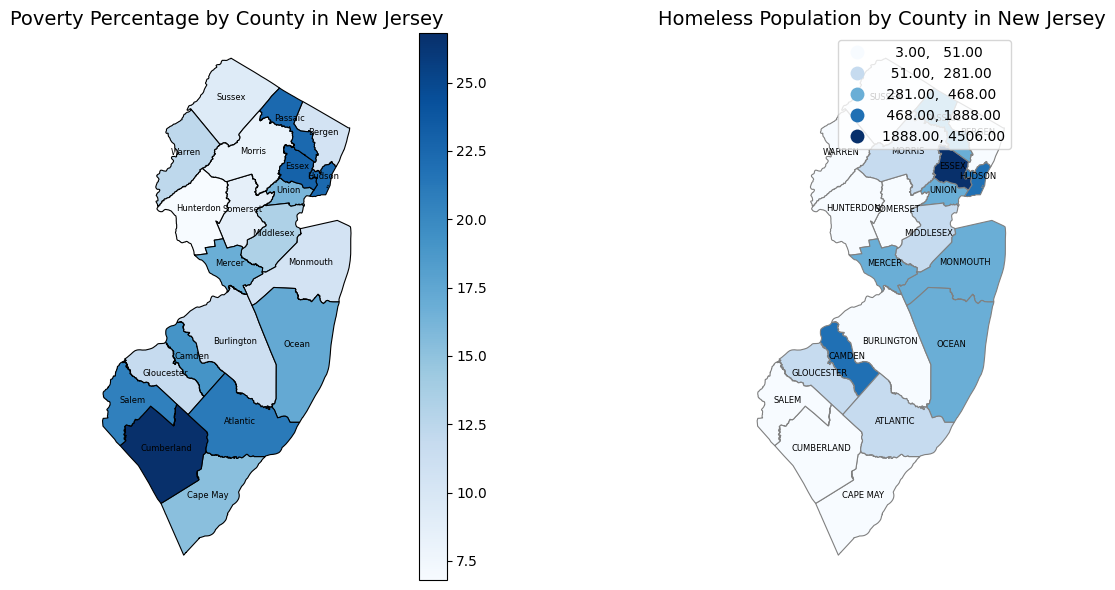

In [70]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import mapclassify

municipality_population = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx')
municipality_poverty = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality%20poverty.xlsx')

url = "https://www2.census.gov/geo/tiger/TIGER2021/COUNTY/tl_2021_us_county.zip"
counties = gpd.read_file(url)
nj_counties = counties[counties['STATEFP'] == '34']  # FIPS code for NJ



# Data for Poverty Percentage by County
data = {
    'County': ['Cumberland', 'Essex', 'Hudson', 'Passaic', 'Atlantic', 'Salem', 'Camden', 'Ocean',
               'Mercer', 'Union', 'Cape May', 'Middlesex', 'Warren', 'Gloucester',
               'Burlington', 'Bergen', 'Monmouth', 'Sussex', 'Somerset', 'Morris', 'Hunterdon'],
    'Value (Percent)': [26.8, 22.9, 22.4, 22.4, 21.1, 20.7, 19.1, 17.2, 16.8, 16.1,
                        15.3, 13.3, 12.3, 11.8, 11.1, 10.5, 10.5, 9.3, 8.6, 8.1, 6.8]
}
df = pd.DataFrame(data)
df['County'] = df['County'].str.strip()


# Merge Poverty Percentage Data
nj_counties['NAME'] = nj_counties['NAME'].str.replace("County", "").str.strip()
nj_counties = nj_counties.merge(df, how='left', left_on='NAME', right_on='County')

# Load and merge Homeless Population Data
Chronicity = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/chronic.xlsx')
Chronicity['COUNTY'] = Chronicity['County'].str.upper().str.strip()
nj_counties['COUNTY'] = nj_counties['NAME'].str.upper().str.strip()
njMerged = nj_counties.merge(Chronicity, left_on='COUNTY', right_on='COUNTY', how='left')

#plot graph
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

# First Map - Poverty Percentage by County
nj_counties.plot(ax=axes[0], column='Value (Percent)', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True)
axes[0].set_title('Poverty Percentage by County in New Jersey', fontsize=14)
axes[0].set_axis_off()

# Add county names on the first map (Poverty Percentage by County)
for _, row in nj_counties.iterrows():
    centroid = row['geometry'].centroid
    axes[0].text(centroid.x, centroid.y, row['NAME'], fontsize=6, ha='center', color='black')

# Second Map - Homeless Population by County
# Ensure you are using a valid classification scheme and the correct column names
njMerged.plot(ax=axes[1],
              column='population',
              cmap='Blues',
              scheme='NaturalBreaks',
              k=5,
              edgecolor='grey',
              linewidth=0.8,
              legend=True,
              )

axes[1].set_title('Homeless Population by County in New Jersey', fontsize=14)
axes[1].set_axis_off()

# Add county names on the second map (Homeless Population by County)
for _, row in njMerged.iterrows():
    centroid = row['geometry'].centroid
    axes[1].text(centroid.x, centroid.y, row['COUNTY'], fontsize=6, ha='center', color='black')

# Adjust layout and show the plot
plt.tight_layout()
plt.show();

### 5-Year Comparison of Total Homeless Population by Housing Situation across Canden County, New Jersey

**Total Homeless Population**

On the night of January 23, 2024, a total of 743 persons in 619 households were experiencing homelessness in Camden County. This Table shows that Camden County has seen an overall increase of 110 identified persons
(17%) from 2020 to 2024; and a gradual increase in population of unsheltered homeless persons between 2021 and 2024.  

Index(['Year', 'Emergency Shelter', 'Unsheltered', 'Transitional Housing',
       'Safe Haven', 'Total'],
      dtype='object')


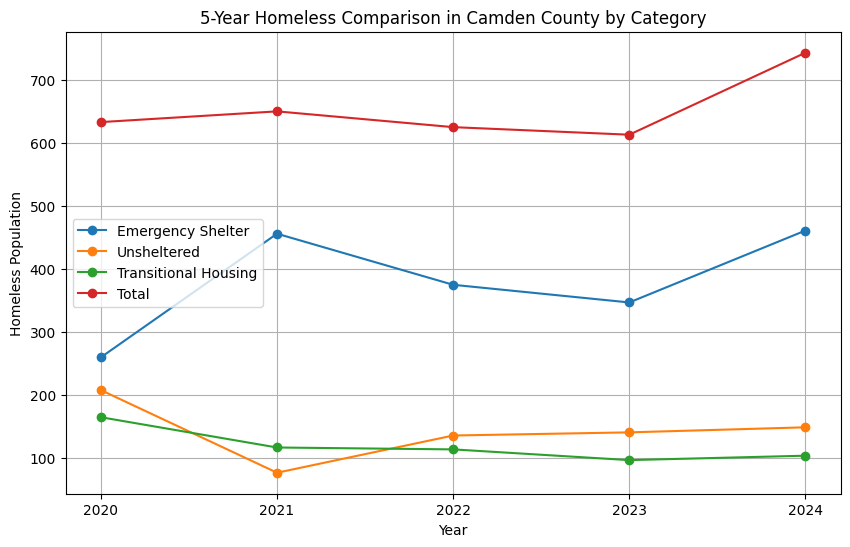

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the raw Excel file
CountyFive = pd.read_excel('https://raw.githubusercontent.com/Funmiadebajo/GIS/main/5%20year%20homeless%20comparison.xlsx', engine='openpyxl')

# Strip whitespace from the column names
CountyFive.columns = CountyFive.columns.str.strip()

# Convert the 'Year' column to integers
CountyFive['Year'] = CountyFive['Year'].astype(int)

# Check the cleaned column names
print(CountyFive.columns)

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot each category against the Year
plt.plot(CountyFive['Year'], CountyFive['Emergency Shelter'], marker='o', label='Emergency Shelter')
plt.plot(CountyFive['Year'], CountyFive['Unsheltered'], marker='o', label='Unsheltered')
plt.plot(CountyFive['Year'], CountyFive['Transitional Housing'], marker='o', label='Transitional Housing')
plt.plot(CountyFive['Year'], CountyFive['Total'], marker='o', label='Total')

# Set titles and labels
plt.title('5-Year Homeless Comparison in Camden County by Category')
plt.xlabel('Year')
plt.ylabel('Homeless Population')
plt.xticks(CountyFive['Year'])  # Set x-ticks to be the year values
plt.legend()
plt.grid(True)

# Show the plot
plt.show();


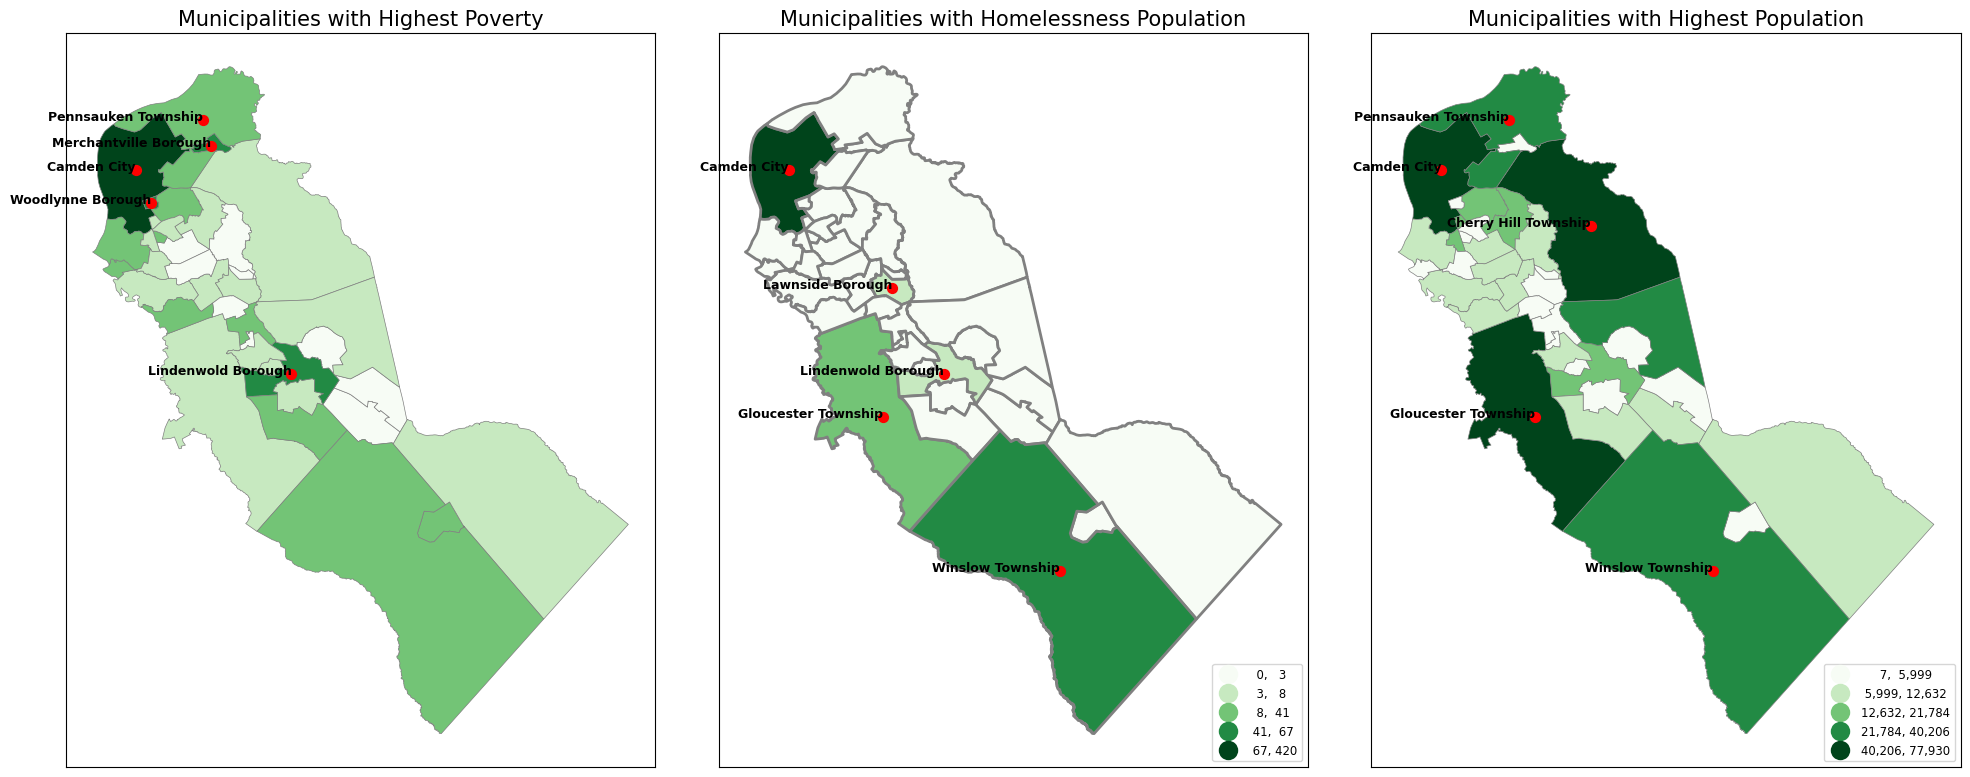

In [100]:
# Load the New Jersey municipalities shapefile
njMun = gpd.read_file('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip')
njMun.rename(columns={'NAMELSAD': 'Municipality'}, inplace=True)

# Load the municipality population data
MunPop = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20population.xlsx')
MunPop['Municipality'] = MunPop['Municipality'].str.strip().str.lower()
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()

# Merge the population data
njMun1 = njMun.merge(MunPop, on='Municipality', how='left')

# Load the homelessness data
MunHom = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/municipality%20homelessness.xlsx')
MunHom['Municipality'] = MunHom['Municipality'].str.strip().str.lower()
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()

# Merge the homelessness data
njMun2 = njMun.merge(MunHom, on='Municipality', how='left')

# Load the poverty data
MunPov = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality%20poverty.xlsx')
MunPov['Municipality'] = MunPov['Municipality'].str.strip().str.lower()
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()

# Merge the poverty data
njMun3 = njMun.merge(MunPov, on='Municipality', how='left')

# Create subplots for the three maps
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Clear any existing axes content
for ax in axs:
    ax.clear()

# Plot Population Data
njMun1.plot(ax=axs[2], column='population', legend=True, cmap='Greens', scheme='natural_breaks', k=5,
            edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}",
            'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
axs[2].set_title("Municipalities with Highest Population", fontsize=15)
axs[2].set_xticks([])  # Remove x-axis ticks
axs[2].set_yticks([])  # Remove y-axis ticks

# Label the top 5 municipalities for population
top_pop_municipalities = njMun1.nlargest(5, 'population')
for idx, row in top_pop_municipalities.iterrows():
    axs[2].scatter(row.geometry.centroid.x, row.geometry.centroid.y, color='red', s=50, zorder=5)  # Pin marker
    axs[2].text(row.geometry.centroid.x, row.geometry.centroid.y, row['Municipality'].title(),
                fontsize=9, ha='right', color='black', weight='bold', zorder=10)  # Label

# Plot Homelessness Data (Reversed position)
njMun2.plot(ax=axs[1], column='Homelessness', legend=True, cmap='Greens', scheme='NaturalBreaks', k=5,
            edgecolor='grey', linewidth=2, legend_kwds={"fmt": "{:,.0f}",
            'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
axs[1].set_title("Municipalities with Homelessness Population", fontsize=15)
axs[1].set_xticks([])  # Remove x-axis ticks
axs[1].set_yticks([])  # Remove y-axis ticks

# Label the top 5 municipalities for homelessness
top_homelessness_municipalities = njMun2.nlargest(5, 'Homelessness')
for idx, row in top_homelessness_municipalities.iterrows():
    axs[1].scatter(row.geometry.centroid.x, row.geometry.centroid.y, color='red', s=50, zorder=5)  # Pin marker
    axs[1].text(row.geometry.centroid.x, row.geometry.centroid.y, row['Municipality'].title(),
                fontsize=9, ha='right', color='black', weight='bold', zorder=10)  # Label

# Plot Poverty Data (Reversed position)
njMun3.plot(ax=axs[0], column='Poverty', legend=False, cmap='Greens', scheme='natural_breaks', k=5,
            edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}",
            'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
axs[0].set_title("Municipalities with Highest Poverty", fontsize=15)
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].set_yticks([])  # Remove y-axis ticks

# Label the top 5 municipalities for poverty
top_poverty_municipalities = njMun3.nlargest(5, 'Poverty')
for idx, row in top_poverty_municipalities.iterrows():
    axs[0].scatter(row.geometry.centroid.x, row.geometry.centroid.y, color='red', s=50, zorder=5)  # Pin marker
    axs[0].text(row.geometry.centroid.x, row.geometry.centroid.y, row['Municipality'].title(),
                fontsize=9, ha='right', color='black', weight='bold', zorder=10)  # Label

# Display the plot
plt.tight_layout()
plt.show();


Median Rental Price in Camden County increased by $200 in the last year, compared to the previous year.

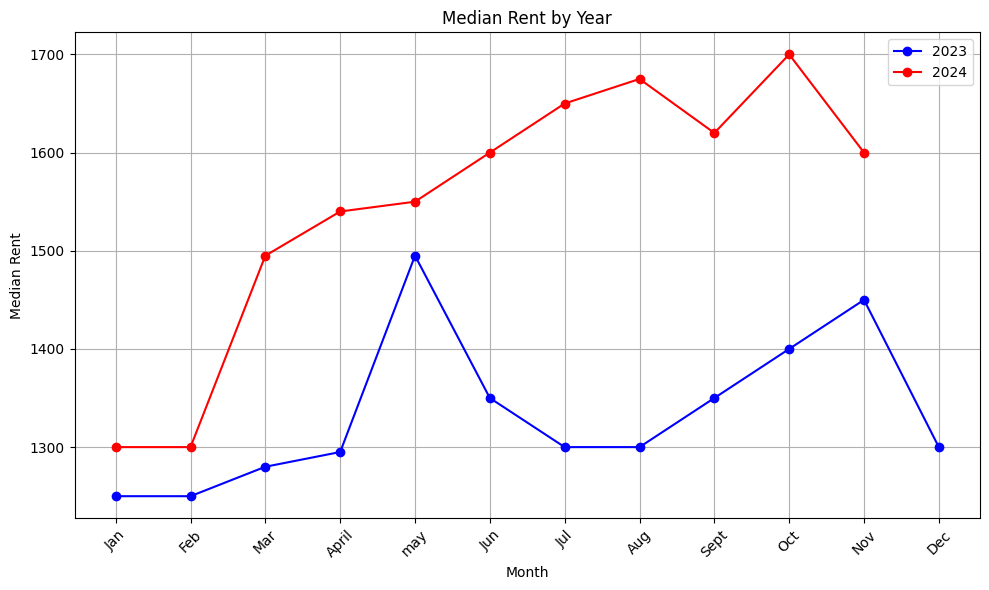

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided URL
data = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/median%20rental%20by%20year.xlsx')

# Plot a line graph
plt.figure(figsize=(10, 6))

# Plotting '2023' and '2024' median rent values against 'Month' (use integer column names)
plt.plot(data['Month'], data[2023], marker='o', linestyle='-', color='b', label='2023')
plt.plot(data['Month'], data[2024], marker='o', linestyle='-', color='r', label='2024')

# Adding labels and title
plt.title('Median Rent by Year')
plt.xlabel('Month')
plt.ylabel('Median Rent')
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the month labels for better readability
plt.tight_layout()
plt.show();


Homelessness is a function of income and housing

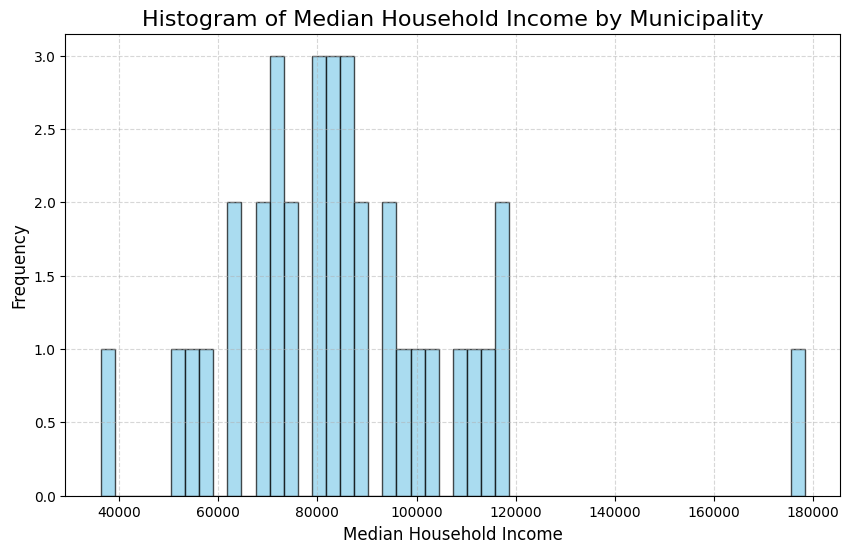

In [86]:
# Load the data
median_income = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')


median_income['Median Household Income'] = median_income['Median Household Income'].replace({'\$': '', ',': ''}, regex=True) # Removing all symbols
median_income['Median Household Income'] = pd.to_numeric(median_income['Median Household Income'], errors='coerce')

# Drop rows with NaN values in the 'Median Household Income' column (if necessary)
median_income = median_income.dropna(subset=['Median Household Income'])

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plot the histogram for 'Median Household Income'
median_income['Median Household Income'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Set the title and labels
plt.title('Histogram of Median Household Income by Municipality', fontsize=16)
plt.xlabel('Median Household Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Enable grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show();


<Axes: >

Text(0.5, 1.0, 'Municipalities with Rent Burden')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Municipalities with Median Gross Rent')

[]

[]

<Axes: >

Text(0.5, 1.0, 'Municipalities with Median Household Income')

[]

[]

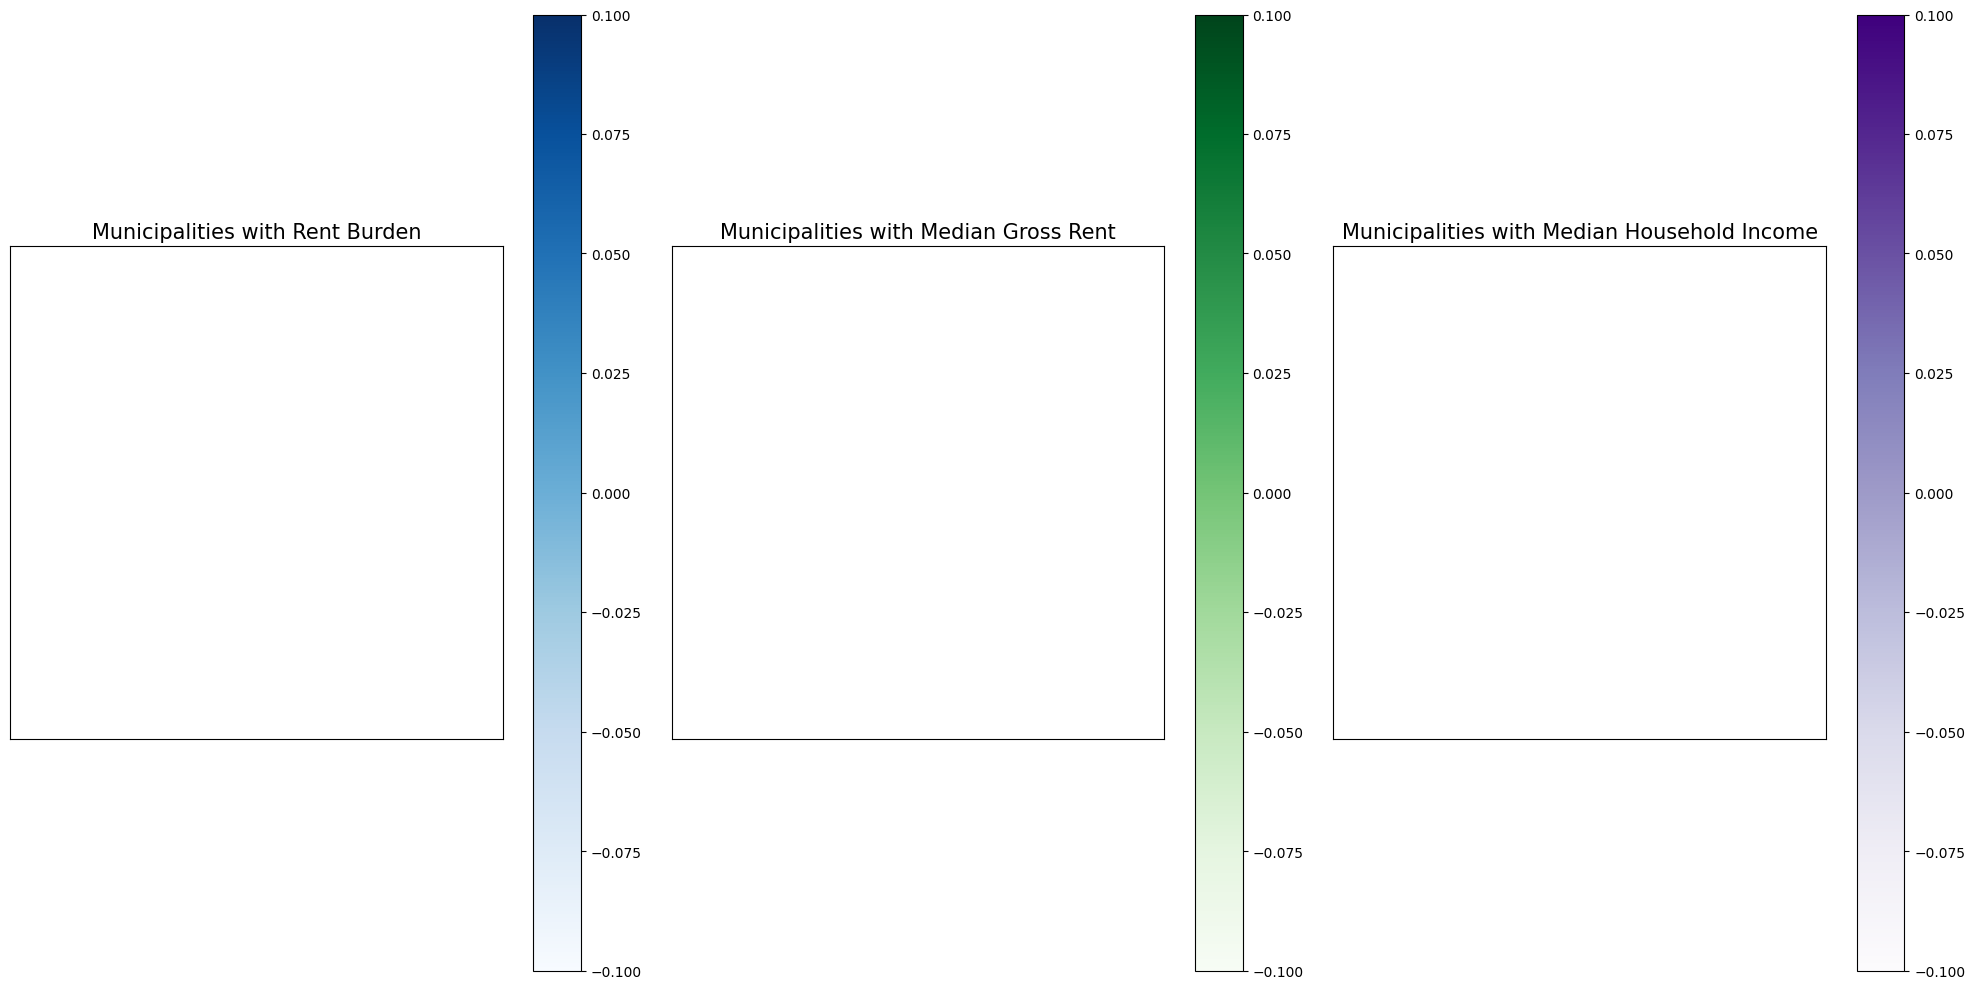

In [104]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Load the New Jersey municipalities shapefile
njMun = gpd.read_file('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Municipality.zip')
njMun.rename(columns={'NAMELSAD': 'Municipality'}, inplace=True)
njMun['Municipality'] = njMun['Municipality'].str.strip().str.lower()


# Load the rent burden data
Rent_Burden = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')

# Remove '%' symbol and other unwanted symbols (like ','), but keep numeric values intact
Rent_Burden['Rent Burden'] = Rent_Burden['Rent Burden'].replace({'%': '', ',': ''}, regex=True)
Rent_Burden['Rent Burden'] = pd.to_numeric(Rent_Burden['Rent Burden'], errors='coerce')

# Drop rows with NaN values in the 'Rent Burden' column
Rent_Burden = Rent_Burden.dropna(subset=['Rent Burden'])


# Load the Median Gross Rent data
MedGroRen = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')

# Remove '%' symbol and other unwanted symbols (like ','), but keep numeric values intact
MedGroRen['Median Gross Rent'] = MedGroRen['Median Gross Rent'].replace({'%': '', ',': ''}, regex=True)
MedGroRen['Median Gross Rent'] = pd.to_numeric(MedGroRen['Median Gross Rent'], errors='coerce')

# Drop rows with NaN values in the 'Median Gross Rent' column
MedGroRen = MedGroRen.dropna(subset=['Median Gross Rent'])

# Load the Median Household Income data
median_income = pd.read_excel('https://github.com/Funmiadebajo/GIS/raw/refs/heads/main/Median%20Income%202022.xlsx')

# Clean Median Household Income data
median_income['Median Household Income'] = median_income['Median Household Income'].replace({'\$': '', ',': ''}, regex=True)
median_income['Median Household Income'] = pd.to_numeric(median_income['Median Household Income'], errors='coerce')

# Drop rows with NaN values in the 'Median Household Income' column
median_income = median_income.dropna(subset=['Median Household Income'])

# Normalize Municipality names in Rent_Burden, MedGroRen, and median_income if necessary
Rent_Burden['Municipality'] = Rent_Burden['Municipality'].str.strip().str.lower()
MedGroRen['Municipality'] = MedGroRen['Municipality'].str.strip().str.lower()
median_income['Municipality'] = median_income['Municipality'].str.strip().str.lower()

# Merge the Rent Burden data with njMun
njMun4 = njMun.merge(Rent_Burden, on='Municipality', how='left')

# Merge the Median Gross Rent data with njMun
njMun5 = njMun.merge(MedGroRen, on='Municipality', how='left')

# Merge the Median Household Income data with njMun
njMun6 = njMun.merge(median_income, on='Municipality', how='left')

# Create subplots for the three maps
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Plot Rent Burden map (Check for empty or constant values and adjust the classification method)
if njMun4['Rent Burden'].nunique() > 1:  # Ensure there are at least 2 unique values
    njMun4.plot(ax=axs[0], column='Rent Burden', legend=True, cmap='Blues', scheme='NaturalBreaks', k=5,
                edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right'})
else:
    njMun4.plot(ax=axs[0], column='Rent Burden', legend=True, cmap='Blues', edgecolor='grey', linewidth=0.5)

axs[0].set_title("Municipalities with Rent Burden", fontsize=15)
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].set_yticks([])  # Remove y-axis ticks

# Plot Median Gross Rent map (Handle cases with insufficient unique values)
if njMun5['Median Gross Rent'].nunique() > 1:
    njMun5.plot(ax=axs[1], column='Median Gross Rent', legend=True, cmap='Greens', scheme='NaturalBreaks', k=5,
                edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right'})
else:
    njMun5.plot(ax=axs[1], column='Median Gross Rent', legend=True, cmap='Greens', edgecolor='grey', linewidth=0.5)

axs[1].set_title("Municipalities with Median Gross Rent", fontsize=15)
axs[1].set_xticks([])  # Remove x-axis ticks
axs[1].set_yticks([])  # Remove y-axis ticks

# Plot Median Household Income map (Handle cases with insufficient unique values)
if njMun6['Median Household Income'].nunique() > 1:
    njMun6.plot(ax=axs[2], column='Median Household Income', legend=True, cmap='Purples', scheme='NaturalBreaks', k=5,
                edgecolor='grey', linewidth=0.5, legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right'})
else:
    njMun6.plot(ax=axs[2], column='Median Household Income', legend=True, cmap='Purples', edgecolor='grey', linewidth=0.5)

axs[2].set_title("Municipalities with Median Household Income", fontsize=15)
axs[2].set_xticks([])  # Remove x-axis ticks
axs[2].set_yticks([])  # Remove y-axis ticks

# Display the plot
plt.tight_layout()
plt.show()


**HOUSING AND INCOME AS INUS CONDITION FOR HOMELESSNESS**

In the context of homelessness, housing and income can act individually and collectively as Insufficient but Necessary parts of Unnecessary but Sufficient conditions that contribute to Homelessness. Alone, neither of them as necessarily causes homelessness, as individuals may have support systems or temporary aids such as Housing Assistance, and other social safety nets. This Bar Chart shows how other risk factors, when interacting, significantly increases the vulnerability to homelessness, and each factor could be necessary within a particular combination but not sufficient on its own.

In [113]:
import pandas as pd

# Assuming 'df' is the DataFrame you're working with

# Step 1: Check the exact column names to ensure there are no hidden characters or spaces
print("Original Column Names:")
print(df.columns)

# Step 2: Clean up the column names by stripping any leading/trailing whitespace
df.columns = df.columns.str.strip()

# Step 3: Verify the column names again after cleaning
print("\nCleaned Column Names:")
print(df.columns)

# Step 4: Access the 'Homelessness Cause' column
try:
    homelessness_cause = df['Homelessness Cause']
    print("\nHomelessness Cause Column Data:")
    print(homelessness_cause)
except KeyError as e:
    print(f"KeyError: {e} - This column may not exist. Please check column names.")

# Step 5: If KeyError still occurs, try accessing the column by its index position
try:
    homelessness_cause_by_index = df.iloc[:, 0]  # Accessing the first column (index 0)
    print("\nHomelessness Cause Column Data by Index:")
    print(homelessness_cause_by_index)
except Exception as e:
    print(f"Error accessing column by index: {e}")



Original Column Names:
Index(['County', 'Value (Percent)'], dtype='object')

Cleaned Column Names:
Index(['County', 'Value (Percent)'], dtype='object')
KeyError: 'Homelessness Cause' - This column may not exist. Please check column names.

Homelessness Cause Column Data by Index:
0     Cumberland
1          Essex
2         Hudson
3        Passaic
4       Atlantic
5          Salem
6         Camden
7          Ocean
8         Mercer
9          Union
10      Cape May
11     Middlesex
12        Warren
13    Gloucester
14    Burlington
15        Bergen
16      Monmouth
17        Sussex
18      Somerset
19        Morris
20     Hunterdon
Name: County, dtype: object
